In [1]:
#로이터 뉴스 분류
from tensorflow.keras.datasets import reuters
#로이터 뉴스 데이터 로딩
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [2]:
from tensorflow.keras.preprocessing import sequence

#가장 긴 길이를 기준으로 사이즈를 맞추고 남은 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [3]:
from keras.utils import np_utils

#원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential()
#임베딩 레이어 Embedding(단어의 개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000, 100)) # 1000개의 단어가 입력되어 100차원으로 출력
#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(46, activation='softmax')) # 46개의 뉴스 카테고리

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
hist = model.fit(X_train, y_train, batch_size=100, epochs=2, validation_split=0.2)

Epoch 1/2
72/72 [==============================] - 3s 16ms/step - loss: 2.6500 - accuracy: 0.3486 - val_loss: 2.4018 - val_accuracy: 0.3450
Epoch 2/2
72/72 [==============================] - 1s 10ms/step - loss: 2.2152 - accuracy: 0.4365 - val_loss: 2.0458 - val_accuracy: 0.4830


In [6]:
print('\n 정확도: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 2.0595 - accuracy: 0.4920

 정확도: 0.4920


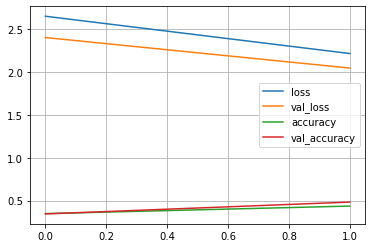

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [8]:
import numpy as np
pred = model.predict(X_test[12].reshape(-1, 50))
np.argmax(pred[0])

4

In [9]:
np.argmax(y_test[12])

1